In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L=100

In [3]:
rede_d = np.zeros((L+1,L+1))
rede_o = np.zeros((L+1,L+1))

In [4]:
rng = np.random.default_rng()
random_seq = rng.integers(4,size=L**2)

In [5]:
tempo, ordem, t0, d0 = 0, 0, 0, 0
while (rede_d[L//2+1][L//2]==0 and rede_d[L//2][L//2+1]==0
       and rede_d[L//2-1][L//2]==0 and rede_d[L//2][L//2-1]==0):
    # Since all conditions are true, we add next particle.
    ordem += 1
    
    x, y = L//2, L//2
    distancia = 0
    while (rede_d[x+1][y]==0 and rede_d[x][y+1]==0
           and rede_d[x-1][y]==0 and rede_d[x][y-1]==0):
        # Since all conditions are true, we can walk.

        try:
            z = random_seq[tempo-t0] # Sorteamos uma de quatro direções
        except:  # autoscale random sequence
            random_seq = rng.integers(4,size=random_seq.size*2)
            t0 = tempo
            z = random_seq[tempo-t0] # Still, sample
            
        if z == 0:   x += 1 # Passo para a direita
        elif z == 1: y += 1 # Passo para cima
        elif z == 2: x -= 1 # Passo para a esquerda
        else:        y -= 1 # Passo para baixo
            
        tempo += 1
            
        # Não permitimos que a partícula saia da rede_d
        if x==0 or x==L or y==0 or y==L: break
            
    rede_o[x][y] = ordem
    rede_d[x][y] = tempo - d0
    d0 = tempo

In [6]:
rede_d[rede_d==0] = np.nan
rede_o[rede_o==0] = np.nan

In [7]:
def heatmap(data, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all 10th ticks...
    ticks = [t for t in range(0, L+1) if t%(L//10)==0]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # ... and label them with the respective list entries.
    tick_labels = [t for t in range(-L//2, L//2 +1) if t%(L//10)==0]
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)

    return im, cbar

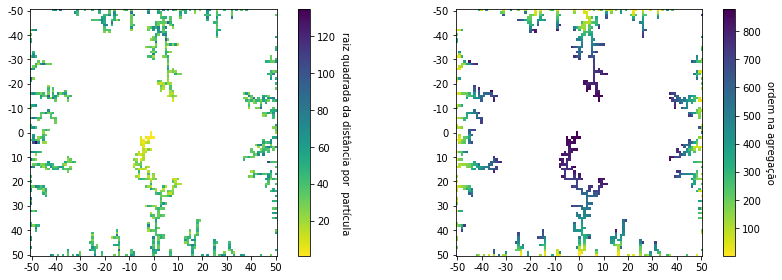

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

im, _ = heatmap(rede_d**(1/2),
                ax=ax1, 
                cmap="viridis_r", 
                cbarlabel="raiz quadrada da distância por  partícula")
im, _ = heatmap(rede_o, 
                ax=ax2, 
                cmap="viridis_r", 
                cbarlabel="ordem na agregação")

plt.tight_layout()
plt.show()